# **Real estate market analysis in México City**<br>
This case study simules that we are a real state company that makes investments in large cities purchasing properties to later rent them as tourist apartments.

The management has made the decision to invest in México City, and has commissioned us to analyze the data that the industry Airbnb makes public to try to find the type of properties that have the greatest commercial potential for tourist rentals.

As the main deliverable, they expect the topology(or typologies) of properties that the valuation team must look for among existing opportunities in the city and the main neighbourhoods or geographical areas on which to focus.

To meet the objetive we will apply the Discovery methodology and Business Analytics(BA) techniques.<br><br>

## Business Analytics<br>
### Objetive<br>
Locate the profile(or profiles) of properties in México City that maximize the commercial potential in the tourist rental market and the main areas where to look for them.<br><br>
### Levers<br>
After speaking with the valuation team, they tell us that the levers that have the most impact on the profitability of this type of investment are:
 * **Rental price**: the more you can charge per night the greater the profitability.
 * **Occupation**: in general, the more days a year a property can be rented, the greater its profitability.
 * **Property price**: the cheaper the property can be acquired, the greater profitability.<br><br>

### Key Performance Indicator(KPI)<br>
* Measure occupancy as the number of annual days that the property can be rented.
* Measure the rental price as the price for night in pesos based on Airbnb information.
* Measure the property price as the multiplication between the number of square meters and the average price of square meter in its geographical area, and we will apply a 25% discount on the official price due to the bargaining power of our purchasing team.<br><br>

### Entities and Data<br>
The entities and data availability for our objetive are:
* Real estate
* Owners
* territorial demarcations

The specific data of each entity will be prepared in the [Exploratory Data Analysis](../../ExploratoryDataAnalysis/RealEstateMarketAirbnb/real_estate_market_airbnb_mexicocity_EDA.ipynb).<br><br> 

### Seed Questions<br>
**About the rental price**:<br><br>
* What is the average price? What is the price range? And by territorial demarcations? And by neighbourhoods?<br>
* What is the ranking of territorial demarcations and neighbourhoods by average rental price?<br>
* What factors(aside from location) determine the rental price?<br>
* What is the relationship between the size of real state and the price at which it can be rented?<br>
* How does competition (number of available properties avalaible per neighbourhood) influence the rental price?<br>
* How do prices vary by rental type(entire apartment, private room, shared room)?<br><br>

**About the occupation**:<br><br>
* What is the average occupancy? And by territorial demarcations? And by neighbourhoods?<br>
* How likely is each level of occupancy in each territorial demarcation?<br>
* What is the ranking of territorial demarcations and neighbourhoods per occupation?<br>
* What factors(aside from location) determine the occupancy?<br>
* What is the relationship between the size of real state and your level of occupancy?<br>
* How does competition(number of available properties per neighbourhood) influence the occupancy?<br><br>

**About the purchase price**:<br><br>
* What is the price ranking per square meter by territorial demarcation?<br>
* What is the property price ranking of the property(square meter * average size) by territorial demarcation?<br>
What is the relationship between the price of the property and the rental price by territorial demarcation?<br>
* What is the relationship between the price of the property and the occupancy by territorial demarcation?<br><br>

### The general outline of this notebook is as follows:
    1. Load data
    2. Prepare variables
    3. Update datamart
    4. Analysis and insights
    5. Communication of results
<br>

### Main work tools<br>

|Package|                           Version|
|:---------------------------------|--------:|
|matplotlib                        | 3.7.2|
|numpy                             | 1.25.2|
|notebook                          | 6.5.4|
|pandas                            | 2.1.1|
|python                            | 3.10.12|
|scipy                             | 1.11.3|
|seaborn                           | 0.12.2|


### Load data

The data comes from public information collected from the Airbnb web-site, prices per square meter were consulted on the online platform flat, and neighbournhoods georeference data from the opendatasoft web-site.

These data sources were explored, cleaned and transformed to select the data necessary to integrate the datamart, which was stored in a database. Specific details can be consulted in the corresponding [Exploratory Data Analysis](../../ExploratoryDataAnalysis/RealEstateMarketAirbnb/real_estate_market_airbnb_mexicocity_EDA.ipynb) directory.

Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa
%config IPCompleter.greedy=True

pd.options.display.max_columns = None

Connect to data source

In [2]:
con = sa.create_engine('sqlite:///data/airbnb_mx.db')
insp = sa.inspect(con)
tables = insp.get_table_names()
tables

['datamart', 'datamart_ba', 'listings', 'listings_detail']

Read the information on  real estate for tourist rental 

In [3]:
df = pd.read_sql('datamart', con=con)
df.head()

,index,id,name,host_id,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,price_m2
0,0,35797,Villa in Mexico City · 1 bedroom · 1 bed · 1 bath,153786,Lomas De Vista Hermosa,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,3437,1,1,363,"Dentro de Villa un estudio de arte con futon, ...",f,2,1.0,1.0,0,NaN,NaN,NaN,36352
1,1,61792,Home in Mexico City · ★4.92 · 1 bedroom · 1 be...,299558,Hipodromo Condesa,Cuauhtémoc,19.41083,-99.18057,Private room,1031,2,2,180,"Located in La Condesa, one of the best neighbo...",f,2,1.0,1.0,63,4.92,4.95,4.94,34599
2,2,67703,Rental unit in Mexico City · ★4.89 · 2 bedroom...,334451,Hipodromo I,Cuauhtémoc,19.41152,-99.16857,Entire home/apt,1890,4,2,307,"Comfortably furnished, sunny, 2 bedroom apt., ...",f,4,2.0,2.0,47,4.89,4.91,4.98,34599
3,3,70644,Rental unit in Mexico City · ★4.91 · 1 bedroom...,212109,Del Carmen,Coyoacán,19.35448,-99.16217,Entire home/apt,737,5,3,158,COYOACAN designer studio quiet & safe! well eq...,f,2,1.0,1.0,120,4.91,4.98,4.97,33101
4,4,84500,Home in Mexico City · 3 bedrooms · 3 beds · 3....,457875,Villa Coyoacan,Coyoacán,19.34724,-99.16551,Entire home/apt,3179,10,1,71,https://www.nytimes.com/2018/04/20/travel/mexi...,f,8,3.0,3.0,0,NaN,NaN,NaN,33101


### Prepare variables

#### Generate KPI of the leavers

* price per night: this already exists in the variable price, but will be analyzed, since in the documentation does not indicate whether the rental price is for one bedroom or for all bedrooms.<br>

* occupation: the table has the variable availability_365, but it needs to be transformed.<br>

* property price: it does not exist, so it will generated from external variables.<br>


Price per night: it is a key information to make the valuation of potential income of a property.<br><br>
Analyze the average price by municipality(neighbourhood_group) and room type:



In [6]:
df.neighbourhood_group.value_counts()

neighbourhood_group
Cuauhtémoc                10622
Miguel Hidalgo             4294
Benito Juárez              2735
Coyoacán                   1390
Álvaro Obregón              875
Tlalpan                     551
Venustiano Carranza         540
Cuajimalpa de Morelos       453
Gustavo A. Madero           296
Iztacalco                   270
Azcapotzalco                224
Iztapalapa                  153
Xochimilco                  110
La Magdalena Contreras      108
Milpa Alta                   19
Tláhuac                      16
Name: count, dtype: int64

In [7]:
df.loc[df.neighbourhood_group == 'Cuauhtémoc'].groupby('room_type').price.mean()

room_type
Entire home/apt    1493.376239
Private room       1001.466053
Shared room         945.753846
Name: price, dtype: float64

Conclusions:

* renting the home/apartment has an average price of \$1493
* renting a private room has a average price of \$1001
* renting a share room  has a average price of \$945

Consequently, to calculate income of a property we must multiply the price by the number of bedrooms when it is a private or shared room type.

However, multiplying the price by the total number of bedrooms can artificially bias upward the income-generating capacity of a property, since, if it is rented by bedroom, it is not likely to always be 100%.

Therefore we should weight it by the average percentage of rented rooms.

We don't have that data, but let's assume that we have spoken with the business manager and he has told us that it is 70%.

In [8]:
def get_total_price(row, factor = 0.70):
    """Calculate rental price based on the type and number of bedrooms,
       and an adjustment factor.
    """
    if (((row.room_type == 'Private room') or (row.room_type == 'Shared room')) and
        (row.bedrooms > 1)):
        total_price = row.price * row.bedrooms * factor
    else:
        total_price = row.price
    return total_price
df['total_price'] = df.apply(get_total_price, axis=1)

In [9]:
 df[['room_type', 'price', 'bedrooms', 'total_price']].sample(30)

,room_type,price,bedrooms,total_price
21761,Private room,450,1.0,450.0
20066,Entire home/apt,1200,1.0,1200.0
7236,Private room,475,1.0,475.0
5634,Entire home/apt,1400,1.0,1400.0
12117,Entire home/apt,2850,1.0,2850.0
9997,Private room,641,1.0,641.0
960,Entire home/apt,1200,1.0,1200.0
13359,Entire home/apt,2167,2.0,2167.0
17646,Entire home/apt,1357,3.0,1357.0
3874,Private room,729,1.0,729.0


occupation: The variable availability_365 tell us the number of days in a year that the property is NOT occupied. Therefore, the variable will be transformed into a direct measure of occupancy, the % of year that IS occupied. 

In [10]:
df['occupation'] = ((1 - (df.availability_365 / 365)) * 100).astype(np.int64)
df[['availability_365','occupation']].head(10)

,availability_365,occupation
0,363,0
1,180,50
2,307,15
3,158,56
4,71,80
5,287,21
6,0,100
7,201,44
8,260,28
9,0,100


#### Transform analysis variables 

To answer the seed questions aimed at checking how the price or occupancy behaves according to other variables such as the number of bedrooms, average ratings, etc., we are going to discretize the variables: accommodates, bedrooms, beds and number_of_reviews.

Discretize bedrooms

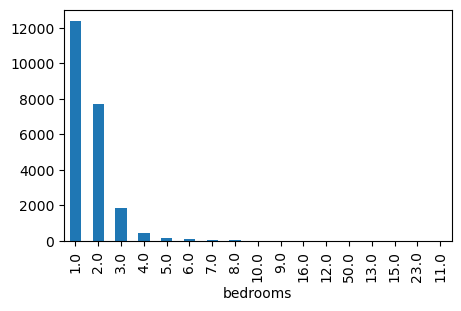

In [11]:
plt.figure(figsize=(5,3))
df.bedrooms.value_counts().plot.bar()
plt.show()

In [13]:
conditions = [
    (df.bedrooms == 1),
    (df.bedrooms == 2),
    (df.bedrooms == 3),
    (df.bedrooms > 3),
]
results = [
    '01_one',
    '02_two',
    '03_three',
    '04_four_or_more',
]
df['disc_bedrooms'] = np.select(conditions, results, default=-999)

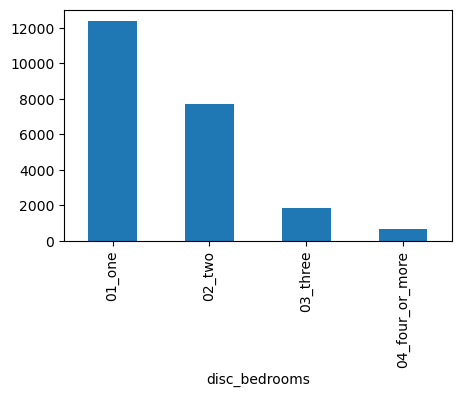

In [14]:
plt.figure(figsize=(5,3))
df.disc_bedrooms.value_counts().plot.bar()
plt.show()

Discretize accommodates, beds and number_of_reviews

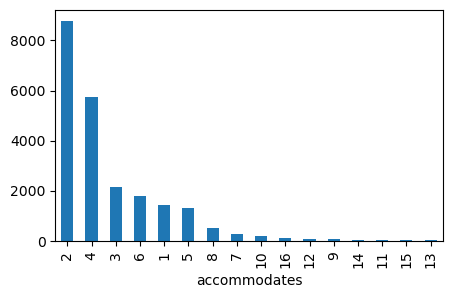

In [15]:
plt.figure(figsize=(5,3))
df.accommodates.value_counts().plot.bar()
plt.show()

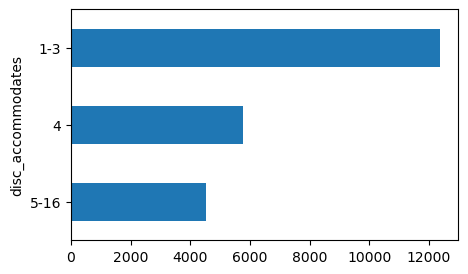

In [16]:
cuts = [0, 0.50, 0.80, 1]
df['disc_accommodates'] = pd.qcut(df.accommodates, cuts, labels=['1-3','4','5-16'])
plt.figure(figsize=(5,3))
df.disc_accommodates.value_counts().sort_index(ascending = False).plot.barh()
plt.show()

Discretize beds

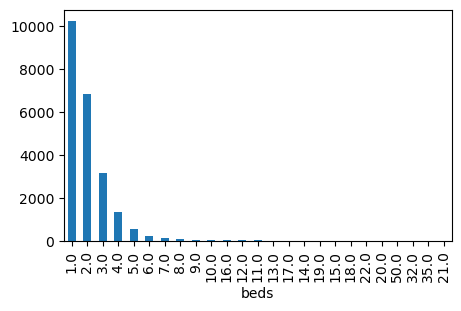

In [17]:
plt.figure(figsize=(5,3))
df['beds'].value_counts().plot.bar()
plt.show()

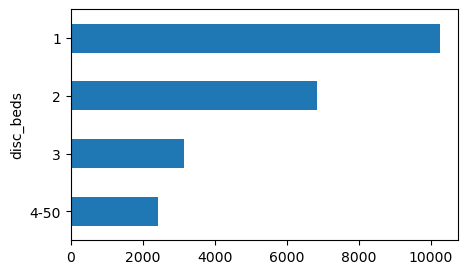

In [18]:
cuts = [0, 1, 2, 3, 50]
names = ['1', '2', '3', '4-50']
plt.figure(figsize=(5,3))
df['disc_beds'] = pd.cut(df['beds'], bins=cuts, labels=names)
df['disc_beds'].value_counts().sort_index(ascending=False).plot.barh()
plt.show()

Discretize number of reviews

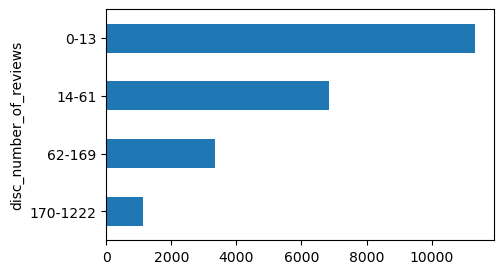

In [19]:
cuts = [0, 0.50, 0.80, 0.95,  1]
names = ['0-13', '14-61', '62-169', '170-1222']
plt.figure(figsize=(5, 3))
df['disc_number_of_reviews'] = pd.qcut(df.number_of_reviews, q=cuts, labels=names)
df['disc_number_of_reviews'].value_counts().sort_index(ascending=False).plot.barh()
plt.show()

#### Generate variables with external data

The **price of the property** is not data available in the data source, so it will be estimated by multiplying the square meters of the property by the price per square meter.

The price per square meter has already been obtained, but the size of the property we do not have it in the data. What we can do is establish criteria based on the number of bedrooms. It's not perfect, but it will serve as an approximation.

Estimation of the square meters of the property:

* one bedroom: m2 = 50
* two bedrooms: m2 = 70
* three bedrooms: m2 = 90
* four bedrooms: m2 = 120
* five or more bedrooms: m2 = 150

In [20]:
conditions = [
    (df.bedrooms == 1), 
    (df.bedrooms == 2),
    (df.bedrooms == 3),
    (df.bedrooms == 4),
    (df.bedrooms > 4),
]
results = [50, 70, 90, 120, 150]
df['m2'] = np.select(conditions, results, default=-999)

In [21]:
df.m2.value_counts()

m2
50     12410
70      7721
90      1847
120      408
150      270
Name: count, dtype: int64

Purchase price estimate
(apply a 25% discount on the official price due to the bargaining power of our purchasing team.)

In [22]:
discount = 0.25
df['purchase_price'] = df.m2 * df.price_m2 * (1 - discount)

In [23]:
df[['bedrooms', 'm2', 'neighbourhood_group', 'price_m2', 'purchase_price']].head(18)

,bedrooms,m2,neighbourhood_group,price_m2,purchase_price
0,1.0,50,Cuajimalpa de Morelos,36352,1363200.0
1,1.0,50,Cuauhtémoc,34599,1297462.5
2,2.0,70,Cuauhtémoc,34599,1816447.5
3,1.0,50,Coyoacán,33101,1241287.5
4,3.0,90,Coyoacán,33101,2234317.5
5,1.0,50,Miguel Hidalgo,40164,1506150.0
6,1.0,50,Coyoacán,33101,1241287.5
7,5.0,150,Miguel Hidalgo,40164,4518450.0
8,1.0,50,Cuauhtémoc,34599,1297462.5
9,1.0,50,Cuauhtémoc,34599,1297462.5


Calculate distance from the property to the the Plaza de la Constitución in Mexico City

In [238]:
from geopy.geocoders import Nominatim
 
loc = Nominatim(user_agent="get_loc_mx")
# entering the location name
get_loc = loc.geocode("Plaza de la Constitución Ciudad de México")
# printing address
print(get_loc.address)
# printing latitude and longitude
print("Latitude = ", get_loc.latitude)
print("Longitude = ", get_loc.longitude)

Zócalo de la Ciudad de México, Francisco I. Madero, Centro Urbano, Cuauhtémoc, Ciudad de México, 06000, México
Latitude =  19.432713
Longitude =  -99.13316157323278


In [25]:
from haversine import haversine

#GPS coordinates of the Plaza de la Constitución in Mexico City(latitude, longitude)
coord_plaza = (get_loc.latitude, get_loc.longitude)
df['distance_to_plaza'] = df.apply(lambda row: haversine(
    coord_plaza,(row.latitude,row.longitude)),axis=1)

Average distance by territorial demarcations

In [26]:
df.groupby('neighbourhood_group')['distance_to_plaza'].mean().sort_values()

neighbourhood_group
Cuauhtémoc                 3.527694
Venustiano Carranza        4.185374
Iztacalco                  5.966200
Gustavo A. Madero          6.401492
Miguel Hidalgo             6.411381
Benito Juárez              6.462913
Azcapotzalco               6.551937
Iztapalapa                10.058202
Coyoacán                  10.901570
Álvaro Obregón            12.087077
La Magdalena Contreras    16.570252
Cuajimalpa de Morelos     17.227415
Tlalpan                   17.737155
Tláhuac                   18.786483
Xochimilco                20.231092
Milpa Alta                27.939423
Name: distance_to_plaza, dtype: float64

### Update datamart

In [27]:
df.to_sql('datamart_ba', con=con, if_exists='replace')

22656

###  Analysis and insights

In this phase we will to try to obtain relevant conclusions using previous work, business analytics techniques and we will generate a map visualization.

In [2]:
con = sa.create_engine('sqlite:///data/airbnb_mx.db')
df = pd.read_sql('datamart_ba', con=con)
df.head()

,level_0,index,id,name,host_id,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,price_m2,total_price,occupation,disc_bedrooms,disc_accommodates,disc_beds,disc_number_of_reviews,m2,purchase_price,distance_to_plaza
0,0,0,35797,Villa in Mexico City · 1 bedroom · 1 bed · 1 bath,153786,Lomas De Vista Hermosa,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,3437,1,1,363,"Dentro de Villa un estudio de arte con futon, ...",f,2,1.0,1.0,0,NaN,NaN,NaN,36352,3437.0,0,01_one,1-3,1,0-13,50,1363200.0,15.560053
1,1,1,61792,Home in Mexico City · ★4.92 · 1 bedroom · 1 be...,299558,Hipodromo Condesa,Cuauhtémoc,19.41083,-99.18057,Private room,1031,2,2,180,"Located in La Condesa, one of the best neighbo...",f,2,1.0,1.0,63,4.92,4.95,4.94,34599,1031.0,50,01_one,1-3,1,62-169,50,1297462.5,5.535141
2,2,2,67703,Rental unit in Mexico City · ★4.89 · 2 bedroom...,334451,Hipodromo I,Cuauhtémoc,19.41152,-99.16857,Entire home/apt,1890,4,2,307,"Comfortably furnished, sunny, 2 bedroom apt., ...",f,4,2.0,2.0,47,4.89,4.91,4.98,34599,1890.0,15,02_two,4,2,14-61,70,1816447.5,4.397858
3,3,3,70644,Rental unit in Mexico City · ★4.91 · 1 bedroom...,212109,Del Carmen,Coyoacán,19.35448,-99.16217,Entire home/apt,737,5,3,158,COYOACAN designer studio quiet & safe! well eq...,f,2,1.0,1.0,120,4.91,4.98,4.97,33101,737.0,56,01_one,1-3,1,62-169,50,1241287.5,9.215857
4,4,4,84500,Home in Mexico City · 3 bedrooms · 3 beds · 3....,457875,Villa Coyoacan,Coyoacán,19.34724,-99.16551,Entire home/apt,3179,10,1,71,https://www.nytimes.com/2018/04/20/travel/mexi...,f,8,3.0,3.0,0,NaN,NaN,NaN,33101,3179.0,80,03_three,5-16,3,0-13,90,2234317.5,10.091660


#### Price analysis

* What is the average price? What is the price range? And by territorial demarcations? And by neighbourhoods?
* What is the ranking of territorial demarcations and neighbourhoods by average rental price?

In [3]:
df.total_price.describe()

count    22656.000000
mean      1373.044249
std       1301.831611
min        400.000000
25%        700.000000
50%       1010.900000
75%       1540.000000
max      32782.400000
Name: total_price, dtype: float64

We can see that there is at least one outlier at the top that biases the mean, therefore we are going to use the median as a more reliable measure of centralization.

In [146]:
df.total_price.median()

1010.9

In [5]:
df.groupby('neighbourhood_group').total_price.median().sort_values(ascending=False)

neighbourhood_group
Cuajimalpa de Morelos     1259.0
Miguel Hidalgo            1257.8
Cuauhtémoc                1098.0
Milpa Alta                1014.0
Álvaro Obregón             969.0
Xochimilco                 900.0
La Magdalena Contreras     889.5
Benito Juárez              850.0
Coyoacán                   850.0
Tlalpan                    800.0
Iztacalco                  787.5
Venustiano Carranza        729.2
Azcapotzalco               700.0
Gustavo A. Madero          654.5
Iztapalapa                 650.0
Tláhuac                    600.0
Name: total_price, dtype: float64

Check the territorial demarcation of Cuajimalpa de Morelos

In [6]:
df.loc[df.neighbourhood_group == 'Cuajimalpa de Morelos'].sort_values(
    'total_price', ascending=False).head(10)

,level_0,index,id,name,host_id,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,price_m2,total_price,occupation,disc_bedrooms,disc_accommodates,disc_beds,disc_number_of_reviews,m2,purchase_price,distance_to_plaza
2103,2103,2103,19072232,Guesthouse in Mexico City · ★5.0 · 5 bedrooms ...,76421517,Jardines De La Palma (Huizachito),Cuajimalpa de Morelos,19.369015,-99.284462,Private room,3437,1,6,265,"Come over, and for sure you'll stay. This is t...",f,8,5.0,1.0,5,5.0,5.0,5.0,36352,12029.5,27,04_four_or_more,5-16,1,0-13,150,4089600.0,17.377547
21895,21895,21895,964460128585503026,Rental unit in Mexico City · ★New · 3 bedrooms...,440929958,Corredor Santa Fe,Cuajimalpa de Morelos,19.361964,-99.267596,Private room,8000,3,1,0,"Increíble Departamento completamente equipado,...",f,6,2.0,4.0,0,NaN,NaN,NaN,36352,11200.0,100,02_two,5-16,4-50,0-13,70,1908480.0,16.146143
15485,15485,15485,746901412968918510,Home in Mexico City · 3 bedrooms · 3 beds · 2....,274037515,Adolfo Lopez Mateos,Cuajimalpa de Morelos,19.364430,-99.294980,Entire home/apt,9950,1,1,0,linda casa en condominio cerca de la naturalez...,f,4,3.0,3.0,0,NaN,NaN,NaN,36352,9950.0,100,03_three,4,3,0-13,90,2453760.0,18.592913
15831,15831,15831,762085726565885374,Home in Mexico City · 2 bedrooms · 3 beds · 2 ...,81293027,Palo Alto (Granjas),Cuajimalpa de Morelos,19.381090,-99.255280,Entire home/apt,7857,1,1,178,"Welcome home, and not just any home. Neusworld...",f,6,2.0,3.0,0,NaN,NaN,NaN,36352,7857.0,51,02_two,5-16,3,0-13,70,1908480.0,14.034987
2325,2325,2325,20267988,Condo in Mexico City · 3 bedrooms · 5 beds · 4...,120996203,Corredor Santa Fe,Cuajimalpa de Morelos,19.361221,-99.279856,Entire home/apt,6983,1,1,365,"Departamento de lujo moderno, elegante con acc...",f,6,3.0,5.0,0,NaN,NaN,NaN,36352,6983.0,0,03_three,5-16,4-50,0-13,90,2453760.0,17.318220
1849,1849,1849,17775212,Rental unit in Mexico City · ★5.0 · 3 bedrooms...,120471582,Corredor Santa Fe,Cuajimalpa de Morelos,19.361880,-99.266250,Entire home/apt,6000,60,3,210,Located in the 25th floor with the best view i...,f,8,3.0,4.0,9,5.0,5.0,5.0,36352,6000.0,42,03_three,5-16,4-50,0-13,90,2453760.0,16.027575
20084,20084,20084,913125897281999940,Home in Mexico City · 3 bedrooms · 3 beds · 4....,14301482,Lomas Del Chamizal,Cuajimalpa de Morelos,19.400513,-99.257992,Entire home/apt,5950,3,2,365,Residencia en el corazón de Lomas de Tecamacha...,f,6,3.0,3.0,0,NaN,NaN,NaN,36352,5950.0,0,03_three,5-16,3,0-13,90,2453760.0,13.571893
13221,13221,13221,636215486406124435,Rental unit in Mexico City · 1 bedroom · 1 bed...,459418667,El Contadero,Cuajimalpa de Morelos,19.350740,-99.299830,Entire home/apt,5401,15,1,0,A stunning luxury apartment located in Stampa<...,f,2,1.0,1.0,0,NaN,NaN,NaN,36352,5401.0,100,01_one,1-3,1,0-13,50,1363200.0,19.714993
6972,6972,6972,41724798,Rental unit in Mexico City · ★4.90 · 2 bedroom...,213204977,Bosques De Las Lomas,Cuajimalpa de Morelos,19.384960,-99.252770,Private room,3800,1,2,0,"Para que tu estancia sea más placentera, Tu ha...",f,2,2.0,2.0,10,4.9,5.0,4.9,36352,5320.0,100,02_two,1-3,2,0-13,70,1908480.0,13.621613
1190,1190,1190,14009995,Rental unit in CDMX · 1 bedroom · 1 bed · 1 bath,83753460,Bosques De Las Lomas,Cuajimalpa de Morelos,19.385690,-99.252890,Private room,5155,1,1,0,Lugares de interés: A media cuadra del Centro ...,f,1,1.0,1.0,0,NaN,NaN,NaN,36352,5155.0,100,01_one,1-3,1,0-13,50,1363200.0,13.601768


In [7]:
df.loc[df.neighbourhood_group == 'Cuajimalpa de Morelos'].sort_values(
    'total_price', ascending=False).head(10)['description'].to_list()

["Come over, and for sure you'll stay. This is the best place to live and enjoy your stay; at the Brick house, we have for our guests: gardens and open common areas; kitchen and dinning room; a cozy living room with a nice fireplace; laundry room, open spaces for barbeque and so much more. Our completely furnished rooms include private bathroom, twin bed, closet, working desk, wifi.<br /><br /><b>The space</b><br />La Casa de Ladrillo or Brick House has 17 fully equipped suites ready for you to enjoy. They are available as short, medium, or long term rentals. They are perfect for professionals or students who need a private, cozy space, with convenient and reliable access the west end of the city.  It's a little place that feels like home.<br /><br />All the suites have an inc suite private bathroom, work desk and space, closet, and some of them have a private balcony and kitchenette.<br />Aside from this all suites have access to the common areas such as gardens, bbq, common kitchen, 

Check the territorial demarcation of Milpa Alta

In [8]:
df.loc[df.neighbourhood_group == 'Milpa Alta'].sort_values(
    'total_price', ascending=False).head(10)

,level_0,index,id,name,host_id,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,price_m2,total_price,occupation,disc_bedrooms,disc_accommodates,disc_beds,disc_number_of_reviews,m2,purchase_price,distance_to_plaza
7807,7807,7807,44552746,Farm stay in Mexico City · 6 bedrooms · 10 bed...,177162332,San Bartolome Xicomulco (Pblo),Milpa Alta,19.207640,-99.076970,Entire home/apt,6800,1,3,257,Ven a relajarte en contacto con la naturaleza ...,f,16,6.0,10.0,0,NaN,NaN,NaN,21933,6800.0,29,04_four_or_more,5-16,4-50,0-13,150,2467462.5,25.712218
10154,10154,10154,51483375,Cottage in Mexico City · 3 bedrooms · 5 beds ·...,177162332,San Bartolome Xicomulco (Pblo),Milpa Alta,19.210440,-99.079290,Entire home/apt,3900,1,3,80,Hermosa Hacienda Campestre en Milpa Alta CDMX...,f,6,3.0,5.0,0,NaN,NaN,NaN,21933,3900.0,78,03_three,5-16,4-50,0-13,90,1480477.5,25.353872
17168,17168,17168,816669688624453377,Cabin in San Pedro Atocpan · 1 bedroom · 2 bed...,497626690,San Pedro Atocpan (Pblo),Milpa Alta,19.205963,-99.055950,Entire home/apt,1951,1,3,365,La Quinta El Mirador es un centro ecoturístico...,f,5,1.0,2.0,1,5.0,5.0,5.00,21933,1951.0,0,01_one,5-16,2,0-13,50,822487.5,26.483328
20874,20874,20874,936231239236774511,Cabin in San Lorenzo Tlacoyucan · ★New · 1 bed...,491459707,San Lorenzo Tlacoyucan (Pblo),Milpa Alta,19.178144,-99.019143,Entire home/apt,1550,1,2,362,Disfruta del campo en la reserva ecológica de ...,f,2,1.0,1.0,0,NaN,NaN,NaN,21933,1550.0,0,01_one,1-3,1,0-13,50,822487.5,30.731799
16305,16305,16305,781987714336312799,Cabin in Mexico City · ★5.0 · 1 bedroom · 1 be...,491459707,Villa Milpa Alta (Pblo),Milpa Alta,19.183633,-99.026544,Entire home/apt,1550,1,2,362,"Relájate en esta escapada única y tranquila, d...",f,2,1.0,1.0,8,5.0,5.0,4.88,21933,1550.0,0,01_one,1-3,1,0-13,50,822487.5,29.871047
17167,17167,17167,816661657424058955,Cabin in San Pedro Atocpan · 1 bedroom · 2 bed...,497626690,San Bartolome Xicomulco (Pblo),Milpa Alta,19.206021,-99.057824,Entire home/apt,1450,1,3,365,La Quinta El Mirador es un centro ecoturístico...,f,3,1.0,2.0,0,NaN,NaN,NaN,21933,1450.0,0,01_one,1-3,2,0-13,50,822487.5,26.417661
11509,11509,11509,54015790,Rental unit in San Antonio Tecómitl · 2 bedroo...,401610205,San Antonio Tecomitl (Pblo),Milpa Alta,19.209800,-98.999670,Entire home/apt,1300,1,1,0,Relájate con toda la familia en este alojamien...,f,4,2.0,2.0,1,1.0,1.0,1.00,21933,1300.0,100,02_two,4,2,0-13,70,1151482.5,28.471022
3318,3318,3318,24780622,Home in Mexico City · 3 bedrooms · 3 beds · 4 ...,185909139,San Salvador Cuauhtenco (Pblo),Milpa Alta,19.186960,-99.092670,Entire home/apt,1200,2,1,365,Disfruta de la tranquilidad de la provincia de...,f,6,3.0,3.0,2,4.5,5.0,5.00,21933,1200.0,0,03_three,5-16,3,0-13,90,1480477.5,27.654916
17701,17701,17701,836362166640170028,Home in Ciudad de México · 1 bedroom · 3 beds ...,225428112,San Pedro Atocpan (Pblo),Milpa Alta,19.216538,-99.047732,Entire home/apt,1060,1,1,362,None,f,6,1.0,3.0,2,4.5,5.0,5.00,21933,1060.0,0,01_one,5-16,3,0-13,50,822487.5,25.654657
17004,17004,17004,810956944513389659,Cabin in San Pedro Atocpan · 1 bedroom · 1 bed...,497626690,San Bartolome Xicomulco (Pblo),Milpa Alta,19.205745,-99.057843,Entire home/apt,1014,1,3,364,La Quinta El Mirador es un centro ecoturístico...,f,2,1.0,1.0,0,NaN,NaN,NaN,21933,1014.0,0,01_one,1-3,1,0-13,50,822487.5,26.446330


* Price in Cuajimalpa de Morelos are  around \\$5,000 - $12,000<br><br>
When reading the description we can see that these prices are defined by the type of property(luxury residential), the places of interest around the property (shopping malls, business centers), amenities of some properties: pool, security, parking lot, gym, spa, garden, playroom , and also that they are well connected.<br><br>

* Milpa Alta stands out in the rest as an ecological place of rest, with territorial demarcations such Miguel Hidalgo, Cuauhtémoc at the head. Furthermore, the average price difference with Cuajimalpa de Morelos(the highest) is very low. Which is an interesting insight:<br><br>
**Insight 1: There may be properties with a high additional value, as they are located in ecological reserves and with outdoor spaces where various services can be offered.**<br><br>

There is no average price difference between Benito Juárez and Coyoacán, so it leads us to compare the average price by territorial demarcations with its average purchase price.

In [9]:
temp = df.groupby('neighbourhood_group')[['total_price','purchase_price']].median()\
    .sort_values(['total_price','purchase_price'], ascending=False)
temp

,total_price,purchase_price
neighbourhood_group,,
Cuajimalpa de Morelos,1259.0,1363200.0
Miguel Hidalgo,1257.8,1506150.0
Cuauhtémoc,1098.0,1297462.5
Milpa Alta,1014.0,822487.5
Álvaro Obregón,969.0,1281187.5
Xochimilco,900.0,924675.0
La Magdalena Contreras,889.5,1199925.0
Benito Juárez,850.0,1523662.5
Coyoacán,850.0,1241287.5


Check the territorial demarcation of Xochimilco

In [10]:
df.loc[df.neighbourhood_group == 'Xochimilco'].sort_values(
    'total_price', ascending=False).head(10)

,level_0,index,id,name,host_id,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,price_m2,total_price,occupation,disc_bedrooms,disc_accommodates,disc_beds,disc_number_of_reviews,m2,purchase_price,distance_to_plaza
15198,15198,15198,735359237816251073,Guesthouse in Mexico City · ★5.0 · 2 bedrooms ...,338339402,Santa Maria Tepepan (Pblo),Xochimilco,19.26844,-99.139081,Entire home/apt,9000,1,1,358,Desconecta de tus preocupaciones en este espac...,f,15,2.0,1.0,6,5.0,5.0,4.5,24658,9000.0,1,02_two,5-16,1,0-13,70,1294545.0,18.276847
7718,7718,7718,44291080,Home in Mexico City · 4 bedrooms · 6 beds · 4 ...,357094856,Bosque Residencial Del Sur (Fracc),Xochimilco,19.27910,-99.128960,Entire home/apt,8000,2,1,365,Lugar cómodo,f,10,4.0,6.0,0,NaN,NaN,NaN,24658,8000.0,0,04_four_or_more,5-16,4-50,0-13,120,2219220.0,17.086696
10785,10785,10785,52858033,Holiday park in Mexico City · 2 bedrooms · 4 b...,212104868,Guadalupe,Xochimilco,19.20961,-99.121610,Entire home/apt,6500,1,17,0,"Zona arbolada, llena de naturaleza, jardines, ...",f,8,2.0,4.0,0,NaN,NaN,NaN,24658,6500.0,100,02_two,5-16,4-50,0-13,70,1294545.0,24.837551
13732,13732,13732,663685152792760351,Place to stay in Mexico City · 1 bedroom · 1 b...,190865624,Santa Maria Nativitas (Pblo),Xochimilco,19.24649,-99.094890,Entire home/apt,6500,1,3,365,Importante leer la descripción y reglas antes ...,f,16,1.0,1.0,0,NaN,NaN,NaN,24658,6500.0,0,01_one,5-16,1,0-13,50,924675.0,21.092825
8677,8677,8677,47068033,Holiday park in Mexico City · 2 bedrooms · 4 b...,212104868,Guadalupe,Xochimilco,19.20793,-99.123340,Entire home/apt,5990,1,17,0,"Alberca siempre a 28 grados, jacuzzi a 30 grad...",f,8,2.0,4.0,0,NaN,NaN,NaN,24658,5990.0,100,02_two,5-16,4-50,0-13,70,1294545.0,25.016002
8277,8277,8277,45864031,Holiday park in Mexico City · 2 bedrooms · 2 b...,212104868,Guadalupe,Xochimilco,19.20809,-99.121110,Entire home/apt,5990,1,17,0,"Zona arbolada, aire puro, alberca climatizada ...",f,8,2.0,2.0,2,5.0,5.0,5.0,24658,5990.0,100,02_two,5-16,2,0-13,70,1294545.0,25.008966
8580,8580,8580,46728666,Holiday park in Mexico City · ★4.80 · 2 bedroo...,212104868,Guadalupe,Xochimilco,19.20971,-99.122950,Entire home/apt,5990,1,17,0,"Alberca climatizada a 28 grados!! techeda, sau...",f,8,2.0,4.0,5,4.8,5.0,4.8,24658,5990.0,100,02_two,5-16,4-50,0-13,70,1294545.0,24.819977
8007,8007,8007,45256913,Cottage in Mexico City · 3 bedrooms · 3 beds ·...,364539918,Santa Cecilia Tepetlapa (Pblo),Xochimilco,19.21697,-99.101710,Entire home/apt,5800,2,1,177,Un espacio para ir a disfrutar y descansar<br ...,f,10,3.0,3.0,0,NaN,NaN,NaN,24658,5800.0,51,03_three,5-16,3,0-13,90,1664415.0,24.215499
5073,5073,5073,33910274,Cottage in Mexico City · ★5.0 · 5 bedrooms · 9...,177162332,Santa Cecilia Tepetlapa (Pblo),Xochimilco,19.21466,-99.084740,Entire home/apt,5700,1,3,79,"Hermosa Hacienda Campestre en Milpa Alta CDMX,...",f,14,5.0,9.0,6,5.0,5.0,5.0,24658,5700.0,78,04_four_or_more,5-16,4-50,0-13,150,2774025.0,24.773062
14849,14849,14849,718709622470872351,casa particular in Mexico City · 3 bedrooms · ...,467990064,Santiago Tepalcatlalpan (Pblo),Xochimilco,19.24695,-99.127821,Entire home/apt,3600,1,1,363,Desconecta de tus preocupaciones en este espac...,f,6,3.0,3.0,0,NaN,NaN,NaN,24658,3600.0,0,03_three,5-16,3,0-13,90,1664415.0,20.663530


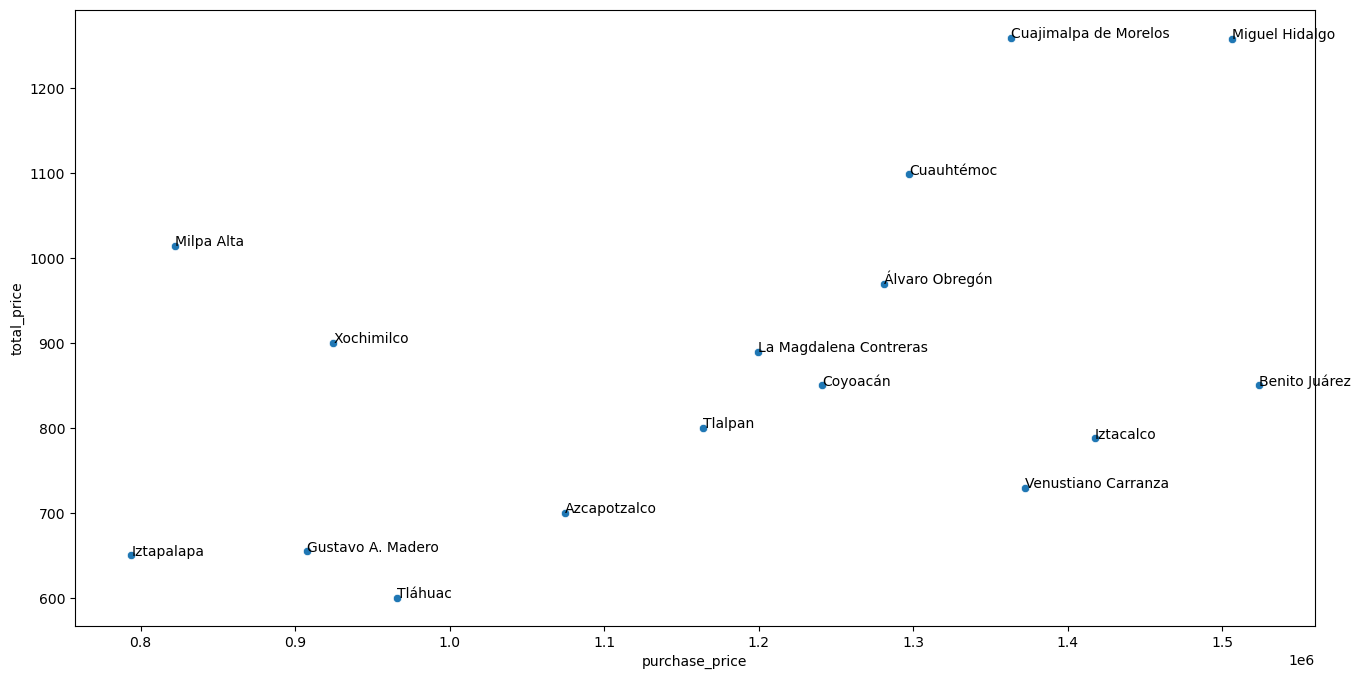

In [11]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
plt.figure(figsize = (16,8))
sns.scatterplot(data=temp, x='purchase_price', y='total_price')
for i in range(0, temp.shape[0]):
    plt.text(temp.purchase_price.iloc[i], temp.total_price.iloc[i],  temp.index[i])

In [12]:
temp[['purchase_price', 'total_price']].corr(method='spearman')

,purchase_price,total_price
purchase_price,1.000000,0.398823
total_price,0.398823,1.000000


Considering the result obtained by Spearman's Rho, there is not clear correlation between purchase price and the price we can charge in some territorial demarcations (Benito Juárez, Iztacalco, Venustiano Carranza, Milpa Alta, Xochimilco). Nevertheless, three clusters are perceived:bajo-bajo, medio-medio, alto-alto.

Exceptions of interest: 

* Milpa Alta: stands out for its ecological resting places.
* Xochimilco: There are wooded properties, which are rented as places of rest, some with heated pools, spaces for parties.


Compare the average price by neighbourhood with its average purchase price.

In [169]:
temp = df.groupby('neighbourhood')[['total_price', 'purchase_price']].median()
temp

,total_price,purchase_price
neighbourhood,,
10 De Abril,450.0,1506150.0
10 De Mayo,693.0,980550.0
1ra Victoria Seccion Bosques,1300.0,1793662.5
20 De Noviembre,671.0,1372770.0
24 De Abril,937.5,1863045.0
...,...,...
Xochinahuac (U Hab),650.0,1934212.5
Xoco,1057.5,2133127.5
Xotepingo,1133.0,1737802.5


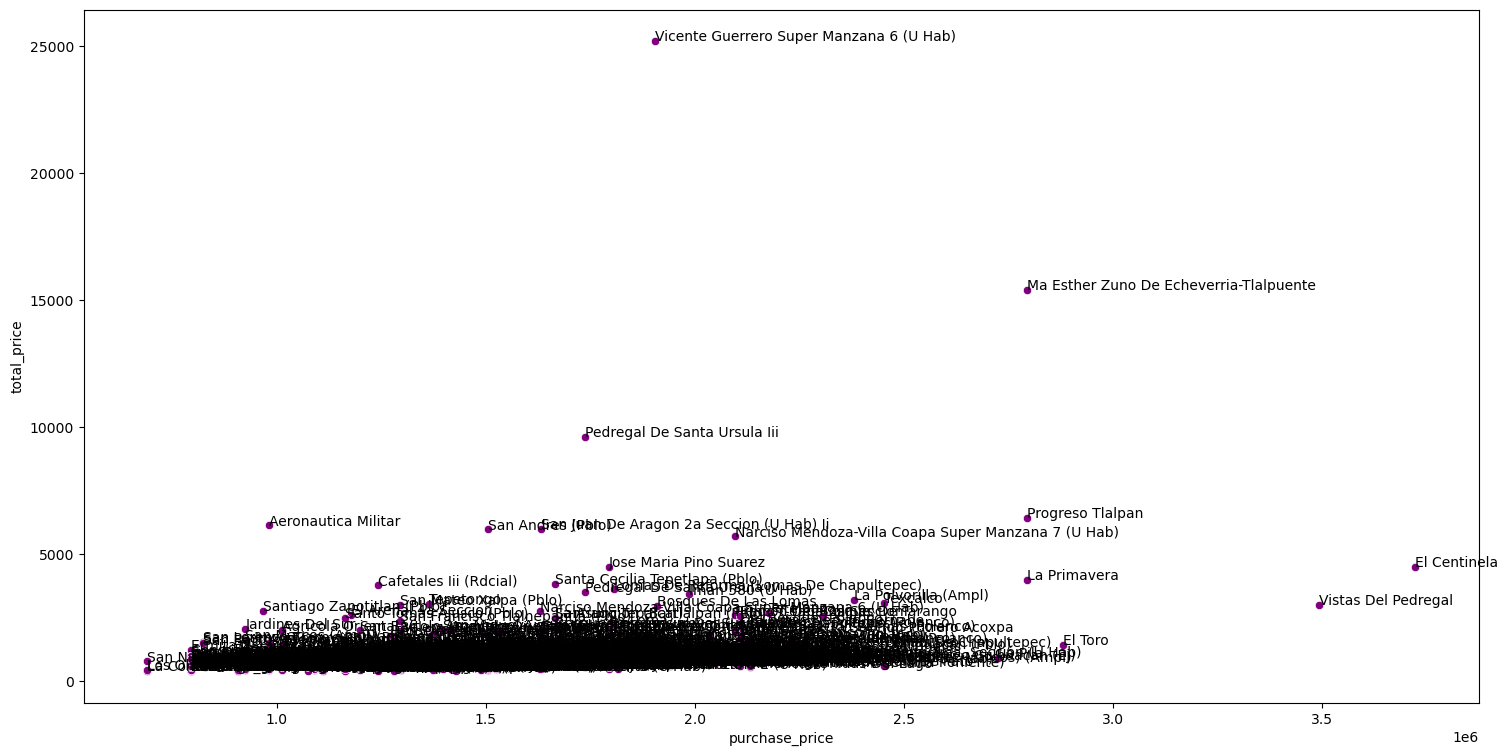

In [171]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
plt.figure(figsize=(18,9))
sns.scatterplot(data=temp, x='purchase_price', y='total_price', color='purple')
for i in range(0, temp.shape[0]):
    plt.text(temp.purchase_price.iloc[i],
             temp.total_price.iloc[i],
             temp.index[i])

Within each cluster we can begin to separate the neighborhoods that stand out the most:
* Low: Aeronautica Militar, Santiago Zapotitla, Cafetales Iii(Rdcial)

* Medium:
Vicente Guerrero Super Manzana 6 (U Hab),Pedregal De Santa Ursula Iii, San Andres (Pblo), San Juan De Aragon 2a Seccion (U Hab) Ii, Narciso Mendoza-Villa Coapa Super Manzana 7 (U Hab),Jose Maria Pino Suarez,

* High:
Ma Esther Zuno De Echeverria-Tlalpuente, Progreso Tlalpan, La Primavera

**Insight 2: There are certain neighbourhoods that a apriori can maximize the cost-income ratio and we can also segment it by the type and quality of the property in which we are interested in investing.**

What factors(aside from location) determine the rental price?

Build minicube

In [15]:
metrics = ['total_price', 'purchase_price']
dimensions = [
    'disc_bedrooms',
    'disc_accommodates',
    'disc_beds',
    'disc_number_of_reviews',
]
minicube_price = df[metrics + dimensions]
minicube_price = minicube_price.melt(id_vars=metrics)
minicube_price = minicube_price.groupby(['variable', 'value'])[metrics].median()
minicube_price

total_price  purchase_price
variable               value                                       
disc_accommodates      1-3                    827.0       1297462.5
                       4                     1203.0       1816447.5
                       5-16                  1550.0       2133127.5
disc_bedrooms          01_one                 843.0       1297462.5
                       02_two                1200.0       1816447.5
                       03_three              1834.0       2335432.5
                       04_four_or_more       3161.0       3614760.0
disc_beds              1                      800.0       1297462.5
                       2                     1125.0       1816447.5
                       3                     1260.0       1816447.5
                       4-50                  1777.5       2335432.5
disc_number_of_reviews 0-13                  1069.0       1506150.0
                       14-61                 1000.0       1523662.5
                       170-1222               923.0       1372770.0
                       62-169                 969.5       1523662.5

Analyze by number of guests

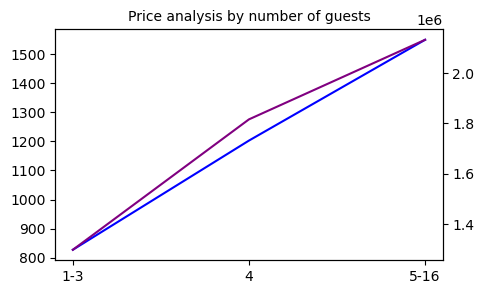

In [100]:

f, ax = plt.subplots(figsize=(5,3))
ax.plot(minicube_price.loc['disc_accommodates'].total_price, color='blue',
        label='total price')
ax.tick_params(labelsize=10)
ax2 = ax.twinx()
ax2.tick_params(labelsize=10)
ax2.plot(minicube_price.loc['disc_accommodates'].purchase_price, color='purple',
         label='purchase price')
plt.title('Price analysis by number of guests', fontsize=10)
plt.show()

Regarding the number of occupants, it is concluded that:

**Insight 3: The number of occupants to avoid is 4, since the price of the property skyrockets, or consider those properties where 5 or more people can be accommodated.**


Analyze by number of bedrooms

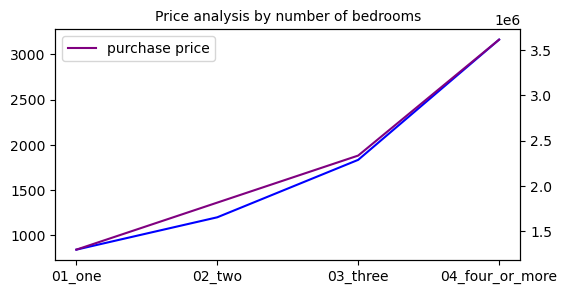

In [50]:
f, ax = plt.subplots(figsize=(6,3))
ax.plot(minicube_price.loc['disc_bedrooms'].total_price, color='blue',
        label='total price')
ax.tick_params(labelsize=10)
ax2 = ax.twinx()
ax2.plot(minicube_price.loc['disc_bedrooms'].purchase_price, color='purple',
         label='purchase price')
ax2.tick_params(labelsize=10)
plt.legend()
plt.title('Price analysis by number of bedrooms', fontsize=10)
plt.show()

Analyze by number of beds

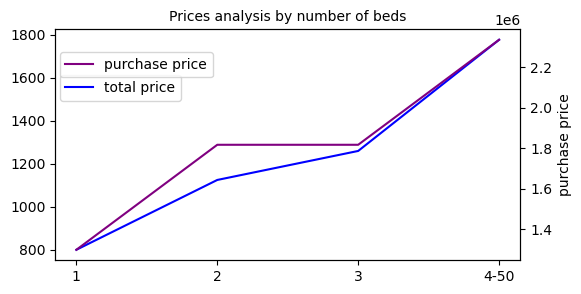

In [97]:
f, ax = plt.subplots(figsize=(6,3))
ax.plot(minicube_price.loc['disc_beds'].total_price, color='blue',
        label='total price')
plt.legend(bbox_to_anchor=(0.01, .8), loc='upper left', borderaxespad=0)
ax.tick_params(labelsize=10)
ax2 = ax.twinx()
ax2.plot(minicube_price.loc['disc_beds'].purchase_price, color='purple',
         label='purchase price')
#ax2.legend(loc='upper left')
plt.legend(bbox_to_anchor=(0.01, .9), loc='upper left', borderaxespad=0)
ax2.tick_params(labelsize=10)
plt.title('Prices analysis by number of beds', fontdict={'fontsize':10})
plt.ylabel('purchase price')
plt.xlabel('beds')
plt.show()

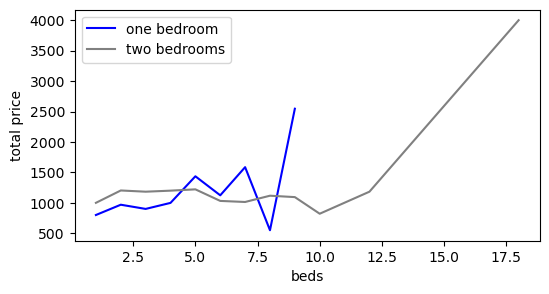

In [46]:
plt.figure(figsize=(6,3))
df[df.bedrooms == 1].groupby('beds').total_price.median().plot(color='blue', label='one bedroom')
df[df.bedrooms == 2].groupby('beds').total_price.median().plot(color='gray', label= 'two bedrooms')
plt.ylabel('total price')
plt.legend()
plt.show()

When analyzing the rental price(total price) in terms of the number of bedrooms, we see that for one and two bedroom properties, there are tenants who have more than 5 beds.

Conclusion regarding the number of beds:<br><br>
**Insight 4: Choose small properties in which you can place a bed, or properties with space for more than 3 beds.**<br>


Finally, analyze the variable of proximity to a point of interest(distance_to_plaza) to see if it has an effect on the price of the rooms.<br>
Select the territorial demarcations close to the the Plaza de la Constitución in México City, that is, the most central ones.<br><br>
To do this, first we are going to calculate the average distance per  territorial demarcations (neighbourhood_group) and choose a cut-off point.

In [104]:
df.groupby('neighbourhood_group').distance_to_plaza.median().sort_values()

neighbourhood_group
Cuauhtémoc                 3.701732
Venustiano Carranza        4.152583
Iztacalco                  5.863741
Miguel Hidalgo             6.185914
Gustavo A. Madero          6.259521
Benito Juárez              6.402551
Azcapotzalco               6.613736
Iztapalapa                 9.086958
Coyoacán                  10.226777
Álvaro Obregón            11.835614
La Magdalena Contreras    16.399957
Tlalpan                   16.677806
Cuajimalpa de Morelos     17.194187
Tláhuac                   17.508633
Xochimilco                19.538848
Milpa Alta                27.654916
Name: distance_to_plaza, dtype: float64

Cut in Iztacalco

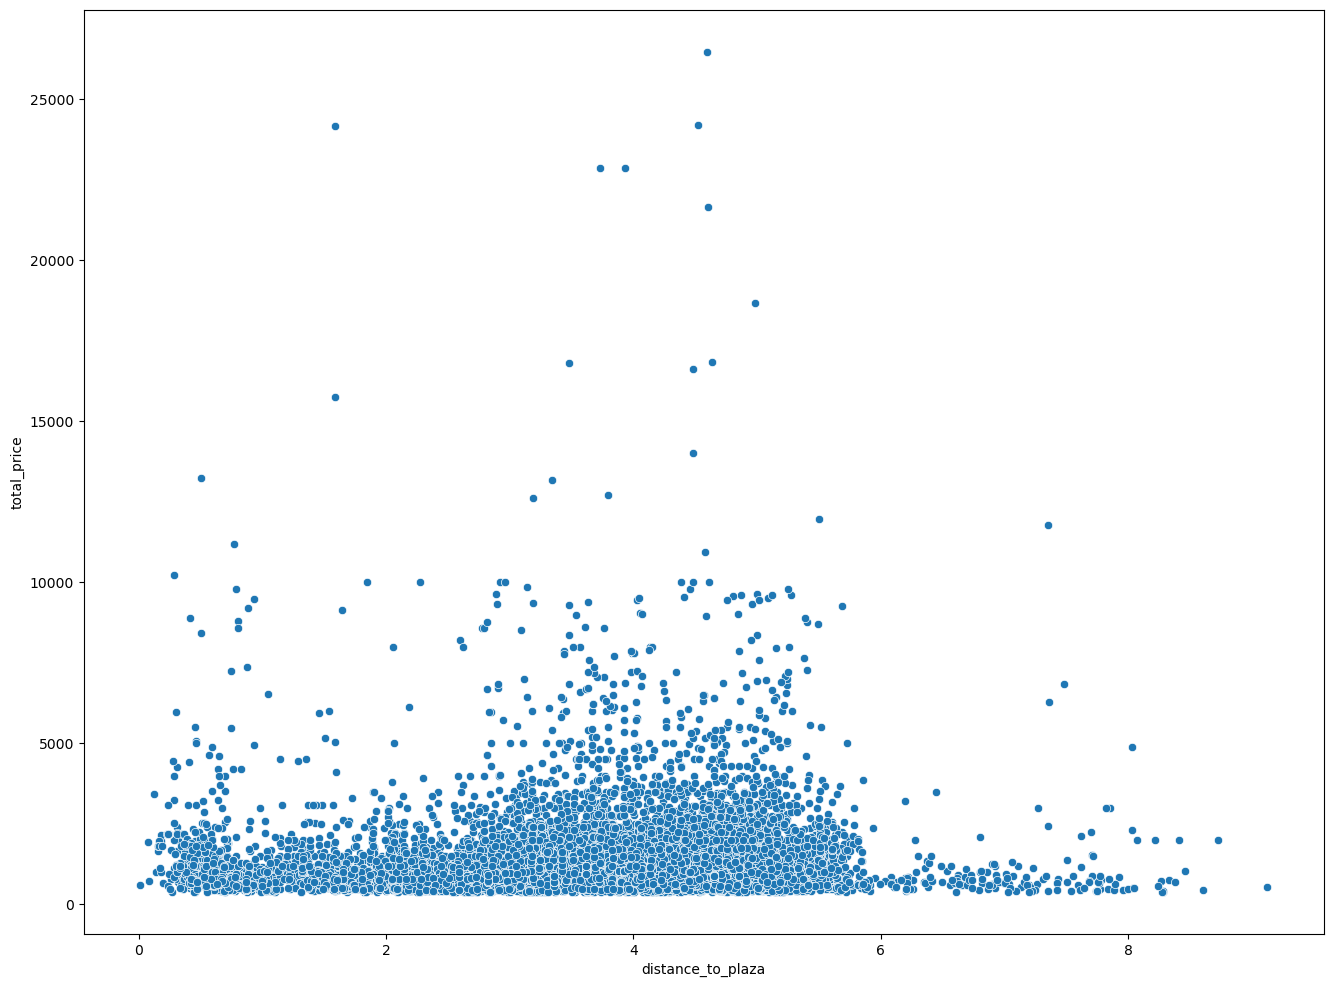

In [111]:
selection = df.groupby('neighbourhood_group').distance_to_plaza.median().sort_values()[0:3]\
    .index.to_list()
plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df.neighbourhood_group.isin(selection)],
                x='distance_to_plaza',
                y = 'total_price');

There does not seem to be as direct a relationship as would be expected between the distance to the Plaza de la Constitución in México City and the rental price.<br><br>
**Insight 5: Being within the territorial demarcation it seems that proximity to points of interest does not have as much impact as would be expected.This opens the door to looking for properties that, being in a central territorial demarcation, are not right next to the Plaza de la Constitución and therefore expectedly have a lower purchase price.**

####  Occupation analysis

What is the average occupancy? And by territorial demarcations? And by neighbourhoods?

In [112]:
df.occupation.describe()

count    22656.000000
mean        36.765316
std         35.228722
min          0.000000
25%          4.000000
50%         26.000000
75%         69.000000
max        100.000000
Name: occupation, dtype: float64

In [144]:
df.groupby('neighbourhood_group').occupation.mean().sort_values(ascending = False)

neighbourhood_group
Xochimilco                46.890909
La Magdalena Contreras    39.407407
Iztacalco                 39.081481
Coyoacán                  39.025180
Benito Juárez             38.657038
Venustiano Carranza       38.296296
Tlalpan                   36.735027
Cuauhtémoc                36.574845
Álvaro Obregón            36.390857
Miguel Hidalgo            35.793666
Iztapalapa                33.803922
Gustavo A. Madero         33.418919
Cuajimalpa de Morelos     32.896247
Azcapotzalco              31.714286
Milpa Alta                29.526316
Tláhuac                   26.687500
Name: occupation, dtype: float64

Check the territorial demarcation of Xochimilco

In [147]:
df.loc[df.neighbourhood_group == 'Xochimilco'].sort_values('occupation', ascending=False).head()

,level_0,index,id,name,host_id,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,price_m2,total_price,occupation,disc_bedrooms,disc_accommodates,disc_beds,disc_number_of_reviews,m2,purchase_price,distance_to_plaza
8677,8677,8677,47068033,Holiday park in Mexico City · 2 bedrooms · 4 b...,212104868,Guadalupe,Xochimilco,19.207930,-99.123340,Entire home/apt,5990,1,17,0,"Alberca siempre a 28 grados, jacuzzi a 30 grad...",f,8,2.0,4.0,0,NaN,NaN,NaN,24658,5990.0,100,02_two,5-16,4-50,0-13,70,1294545.0,25.016002
5754,5754,5754,37323680,Holiday park in Mexico City · 1 bedroom · 2 be...,212104868,Guadalupe,Xochimilco,19.207460,-99.121170,Entire home/apt,990,1,17,0,"Nuestros espacios, jardines, alberca, jacuzzi,...",f,6,1.0,2.0,2,5.0,5.0,5.00,24658,990.0,100,01_one,5-16,2,0-13,50,924675.0,25.078613
6149,6149,6149,38792923,Home in Mexico City · 3 bedrooms · 4 beds · 2....,271635002,Nativitas La Joya (Ampl),Xochimilco,19.225430,-99.095840,Entire home/apt,1700,1,2,0,"<b>The space</b><br />casa sola,ambiente tranq...",f,8,3.0,4.0,1,3.0,5.0,5.00,24658,1700.0,100,03_three,5-16,4-50,0-13,90,1664415.0,23.379156
15370,15370,15370,742728997819112659,Holiday park in Mexico City · 2 bedrooms · 4 b...,212104868,Guadalupe,Xochimilco,19.208532,-99.120207,Entire home/apt,1200,1,17,0,Este alojamiento es una joya de otro planeta.,f,8,2.0,4.0,0,NaN,NaN,NaN,24658,1200.0,100,02_two,5-16,4-50,0-13,70,1294545.0,24.964903
5574,5574,5574,36429246,Rental unit in Mexico City · ★4.0 · 1 bedroom ...,179892673,Santa Maria Tepepan (Pblo),Xochimilco,19.270530,-99.135100,Entire home/apt,800,2,1,0,"Moderno departamento Colonial Nuevo, dentro de...",f,2,1.0,1.0,3,4.0,5.0,4.67,24658,800.0,100,01_one,1-3,1,0-13,50,924675.0,18.035098


These properties have 100% occupancy of the year because are rented as places of rest, some with heated pools, gardens, characteristics identified in the price analysis in our insight 1.

There is no average occupation difference between Iztacalco and Coyoacán, so it leads us to compare the average occupation by territorial demarcations with its median purchase price.

In [160]:
temp = df.groupby('neighbourhood_group')[['occupation','purchase_price']]\
    .agg({'occupation':'mean','purchase_price':'median'})
temp

,occupation,purchase_price
neighbourhood_group,,
Azcapotzalco,31.714286,1074562.5
Benito Juárez,38.657038,1523662.5
Coyoacán,39.025180,1241287.5
Cuajimalpa de Morelos,32.896247,1363200.0
Cuauhtémoc,36.574845,1297462.5
Gustavo A. Madero,33.418919,907350.0
Iztacalco,39.081481,1417500.0
Iztapalapa,33.803922,793912.5
La Magdalena Contreras,39.407407,1199925.0


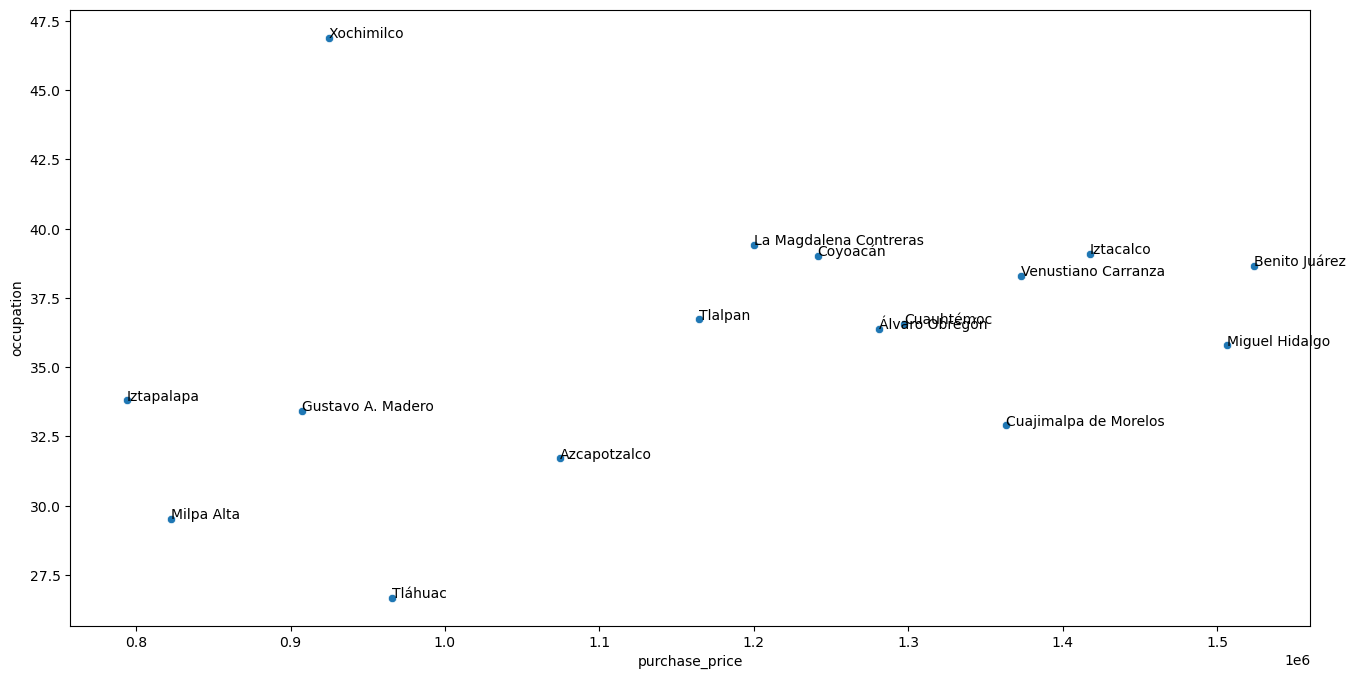

In [166]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
plt.figure(figsize = (16,8))
sns.scatterplot(data=temp, x='purchase_price', y='occupation')
for i in range(0, temp.shape[0]):
    plt.text(temp.purchase_price.iloc[i], temp.occupation.iloc[i],  temp.index[i])

In [163]:
temp[['purchase_price', 'occupation']].corr(method='spearman')

,purchase_price,occupation
purchase_price,1.000000,0.370588
occupation,0.370588,1.000000


Considering the result obtained by Spearman's Rho, there is not clear correlation between purchase price and the average occupation in the territorial demarcations. Although in the graph we can distinguish a group of territorial demarcations with greater occupation: La Magdalena Contreras, Coyoacán, Tlalpan, Cuauhtémoc, Álvaro Obregón, with the exception of Xochimilco which was analyzed in advance. <br><br>
Analyze occupancy level by neighborhood


In [197]:
temp = df.groupby('neighbourhood')[['occupation','purchase_price']]\
    .agg({'occupation':'mean','purchase_price':'median'})
temp

,occupation,purchase_price
neighbourhood,,
10 De Abril,100.000000,1506150.0
10 De Mayo,20.000000,980550.0
1ra Victoria Seccion Bosques,15.000000,1793662.5
20 De Noviembre,17.444444,1372770.0
24 De Abril,6.500000,1863045.0
...,...,...
Xochinahuac (U Hab),9.000000,1934212.5
Xoco,45.545455,2133127.5
Xotepingo,16.250000,1737802.5


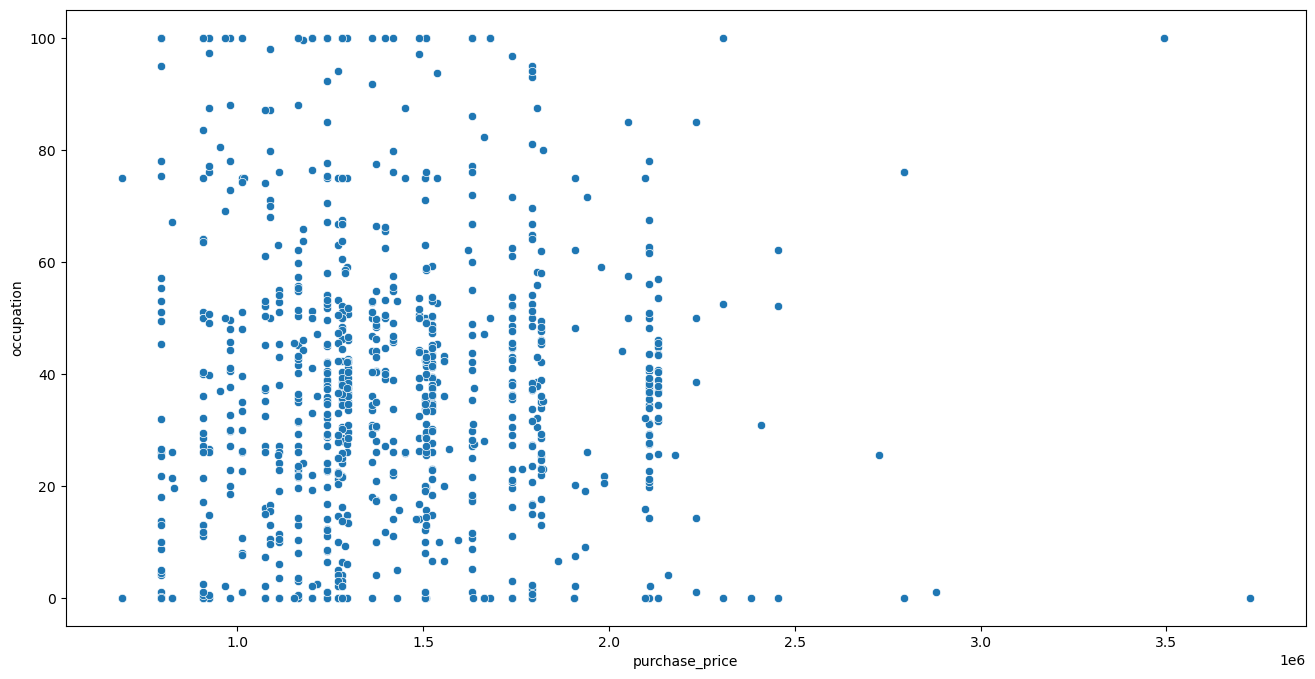

In [200]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
plt.figure(figsize = (16,8))
sns.scatterplot(data=temp, x='purchase_price', y='occupation')
plt.show()

Consult properties with occupancy levels close to 100% at different purchase price groups

In [212]:
zoom_temp = temp[(temp.occupation > 90) & (temp.purchase_price < 1e6)]
zoom_temp.sort_values('purchase_price').head(5)

,occupation,purchase_price
neighbourhood,,
2a Ampliacion Santiago Acahualtepec Ii,100.0,793912.5
Ermita Zaragoza (U Hab) I,100.0,793912.5
Leyes De Reforma 1a Seccion,100.0,793912.5
Lomas Estrella 2a Secc Ii,100.0,793912.5
Paraje Zacatepec,95.0,793912.5


In [213]:
zoom_temp = temp[(temp.occupation > 90) & (temp.purchase_price.between(1e6,2e6))]
zoom_temp.sort_values('purchase_price').head(5)

,occupation,purchase_price
neighbourhood,,
Ex Ejidos De La Magdalena Mixihuca,100.0,1012500.0
Constitucion De La Republica,98.0,1088820.0
Granjas Coapa Oriente,100.0,1164262.5
Tres Fuentes (U Hab),100.0,1164262.5
Puebla,99.5,1176660.0


In [214]:
zoom_temp = temp[(temp.occupation > 90) & (temp.purchase_price > 2e6)]
zoom_temp.sort_values('purchase_price').head(5)

,occupation,purchase_price
neighbourhood,,
Piloto (Adolfo Lopez Mateos) (Ampl),100.0,2306137.5
Vistas Del Pedregal,100.0,3492787.5


A group of neighborhoods are identified that have an occupancy level close to 100% of the year with low, medium and high purchase prices.
Within each cluster we can begin to separate the neighborhoods that stand out the most:<br><br>
* Low: 2a Ampliacion Santiago Acahualtepec Ii	1, Ermita Zaragoza (U Hab) I, Leyes De Reforma 1a Seccion, Lomas Estrella 2a Secc Ii, Paraje Zacatepec.<br>
* Medium: Ex Ejidos De La Magdalena Mixihuca, Constitucion De La Republica, Granjas Coapa Oriente, Tres Fuentes (U Hab), Puebla.<br>
* High: Piloto (Adolfo Lopez Mateos) (Ampl), Vistas Del Pedregal.<br><br>

**Insight 6: There are certain neighbourhoods that apriori income can be assured by staying rented for most of the year and we can also segment it by the type and quality of the property in which we are interested in investing.**


What factors(aside from location) determine the occupancy?

Build a minicube

In [226]:
metrics = ['occupation', 'purchase_price']
dimensions = [
    'disc_bedrooms',
    'disc_accommodates',
    'disc_beds',
    'disc_number_of_reviews',
]
minicube_occupation = df[metrics + dimensions]
minicube_occupation = minicube_occupation.melt(id_vars=metrics)
minicube_occupation = minicube_occupation.groupby(['variable', 'value'])[metrics]\
    .agg({'occupation':'mean','purchase_price':'median'})
minicube_occupation

occupation  purchase_price
variable               value                                      
disc_accommodates      1-3               36.430269       1297462.5
                       4                 38.071751       1816447.5
                       5-16              36.020305       2133127.5
disc_bedrooms          01_one            36.162772       1297462.5
                       02_two            37.934594       1816447.5
                       03_three          37.734164       2335432.5
                       04_four_or_more   31.839233       3614760.0
disc_beds              1                 36.132046       1297462.5
                       2                 37.874033       1816447.5
                       3                 36.852632       1816447.5
                       4-50              36.195778       2335432.5
disc_number_of_reviews 0-13              36.791208       1506150.0
                       14-61             36.019436       1523662.5
                       170-1222          34.981449       1372770.0
                       62-169            38.816216       1523662.5

Analyze by number of bedrooms

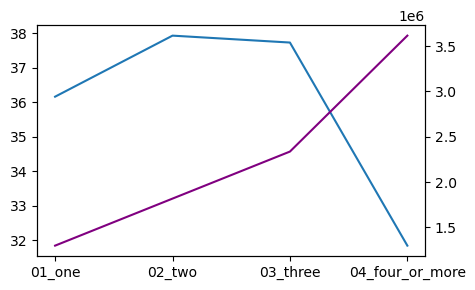

In [230]:
f, ax = plt.subplots(figsize=(5,3))
ax.plot(minicube_occupation.loc['disc_bedrooms'].occupation)
ax2 = ax.twinx()
ax2.plot(minicube_occupation.loc['disc_bedrooms'].purchase_price,color = 'purple');

Regarding the number of bedrooms:<br><br>
There is no big difference in the occupancy level of properties with one or 3 bedrooms, furthermore the purchase price increases with 4 or more bedrooms and its level decreases.

**insight 7: The number of bedrooms to avoid is 4, since the occupancy level drops and the price of the property skyrockets.**

Analyze by number of beds

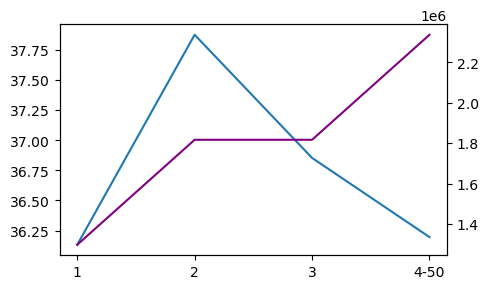

In [234]:
f, ax = plt.subplots(figsize=(5,3))
ax.plot(minicube_occupation.loc['disc_beds'].occupation)
ax2 = ax.twinx()
ax2.plot(minicube_occupation.loc['disc_beds'].purchase_price,color='purple');

Regarding the number of beds:<br>
Conclusion similar to the analysis by number of rooms.

Analyze by the number of accommodates

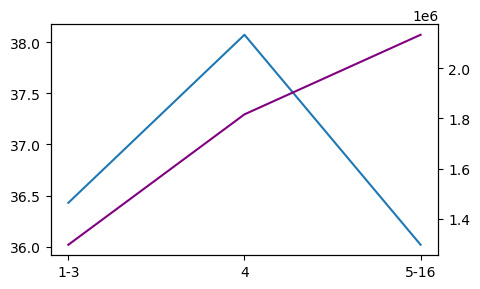

In [236]:
f, ax = plt.subplots(figsize=(5,3))
ax.plot(minicube_occupation.loc['disc_accommodates'].occupation)
ax2 = ax.twinx()
ax2.plot(minicube_occupation.loc['disc_accommodates'].purchase_price, color='purple')
plt.show()

There is no big difference in the occupancy level of properties with capacity for more than 3 occupants.

#### Geographic analysis on a map

Geographically analyze insight 1, about properties with additional value due to their location in ecological areas, such as the territorial demarcation of Milpa Alta and Xochimilco.

In [237]:
import folium

In [258]:
get_loc = loc.geocode("Milpa Alta")
df_insight1 = df[df.neighbourhood_group.isin(['Milpa Alta'])].copy()
df_insight1['disc_total_price'] = pd.qcut(df_insight1['total_price'], q = [0, .25, .5, .75, 1.], 
                              labels=['yellow', 'orange', 'blue', 'purple'])
mapa = folium.Map(location=[get_loc.latitude, get_loc.longitude],zoom_start=12)
for p in range(0,len(df_insight1)):
   folium.CircleMarker(
      location = [df_insight1.iloc[p]['latitude'], df_insight1.iloc[p]['longitude']],
      popup = df_insight1.iloc[p]['total_price'],
      fill=True,
      color = df_insight1.iloc[p]['disc_total_price'],
      fill_opacity=1,
      radius = 5
   ).add_to(mapa)
mapa

**Insight 8: There are some properties(point yellow and orange) which may indicate that there is still potential to further exploit the factor of rest and ecological areas.**

### Communication of results

We are going to generate an [**executive report**](Conclusions_airbnb_mexicocity_BA.ipynb) with the main conclusions that will allow management to set a strategy and the valuation team to begin searching for concrete properties under the lines drawn.

S2!

**ACC**